In [1]:
from sklearn import cross_validation, neighbors, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Load dataset of blood smear image patches, with labels corresponding to the presence of absence of plasmodium.

<b>Dataset citation:</b><br>
J.A. Quinn, A. Andama, I. Munabi, F.N. Kiwanuka. <i>Automated Blood Smear Analysis for Mobile Malaria Diagnosis</i>. Chapter in Mobile Point-of-Care Monitors and Diagnostic Device Design, eds. W. Karlen and K. Iniewski, CRC Press, 2014. <br>http://air.ug/~jquinn/papers/AutomatedMalariaDiagnosisChapter.pdf



In [2]:
data = np.load('malaria-classification-example.npz')
X = data['X']
y = data['y']
images = data['images']

In [54]:
list(X[0,:])

[131.0,
 131.0,
 132.0,
 132.0,
 135.0,
 135.0,
 136.0,
 136.0,
 136.0,
 137.0,
 137.0,
 138.0,
 137.0,
 138.0,
 138.0,
 137.0,
 134.0,
 131.0,
 128.0,
 126.0,
 125.0,
 125.0,
 124.0,
 125.0,
 126.0,
 126.0,
 127.0,
 127.0,
 127.0,
 129.0,
 132.0,
 133.0,
 133.0,
 133.0,
 134.0,
 136.0,
 137.0,
 138.0,
 139.0,
 141.0,
 131.0,
 132.0,
 133.0,
 134.0,
 134.0,
 135.0,
 136.0,
 136.0,
 136.0,
 136.0,
 137.0,
 138.0,
 136.0,
 136.0,
 135.0,
 133.0,
 131.0,
 128.0,
 125.0,
 123.0,
 122.0,
 122.0,
 122.0,
 122.0,
 122.0,
 123.0,
 125.0,
 125.0,
 127.0,
 129.0,
 130.0,
 131.0,
 130.0,
 131.0,
 133.0,
 135.0,
 136.0,
 137.0,
 139.0,
 140.0,
 131.0,
 132.0,
 132.0,
 132.0,
 133.0,
 134.0,
 134.0,
 135.0,
 136.0,
 136.0,
 136.0,
 136.0,
 135.0,
 134.0,
 132.0,
 129.0,
 127.0,
 124.0,
 121.0,
 119.0,
 116.0,
 116.0,
 116.0,
 117.0,
 119.0,
 121.0,
 123.0,
 124.0,
 126.0,
 126.0,
 127.0,
 127.0,
 129.0,
 130.0,
 132.0,
 133.0,
 135.0,
 136.0,
 137.0,
 138.0,
 131.0,
 132.0,
 132.0,
 132.0,
 133.0,


### Show sample images with positive labels

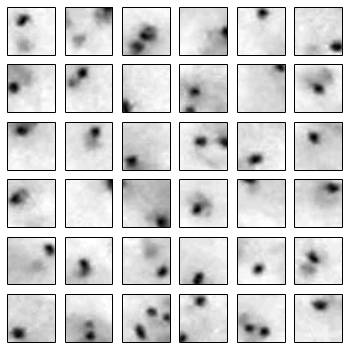

In [4]:
pos = np.where(y==1)[0]

figsize(6,6)
for i in range(36):
    plt.subplot(6,6,i)
    plt.imshow(images[pos[i],:,:], cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

### Show sample images with negative labels

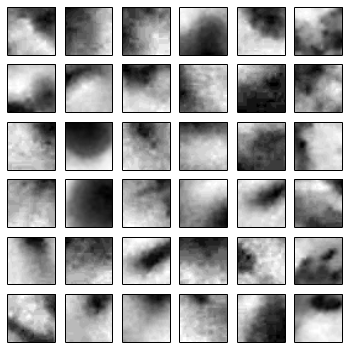

In [5]:
neg = np.where(y==0)[0]

figsize(6,6)
for i in range(36):
    plt.subplot(6,6,i)
    plt.imshow(images[neg[i],:,:], cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

### Train and test a nearest neighbour classifier

In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

In [60]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print 'Accuracy = %.3f' % (metrics.accuracy_score(y_test,y_pred>0.5))

Accuracy = 0.736


### Show the nearest neighbours for test images

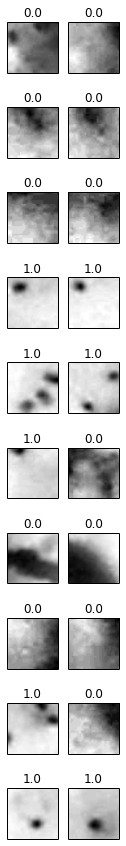

In [56]:
nn = neighbors.NearestNeighbors(n_neighbors=5)
nn.fit(X_train)

N_examples = 10
figsize(2,15)
for i in range(N_examples):
    subplot(N_examples,2,2*i+1)
    plt.imshow(np.reshape(X_test[i,:],(40,40)), cmap=plt.cm.gray)
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])
    
    subplot(N_examples,2,2*i+2)
    neighbour_idx = int(nn.kneighbors(X_test[i,:].reshape(1,-1))[1])
    plt.imshow(np.reshape(X_train[neighbour_idx,:],(40,40)), cmap=plt.cm.gray)
    plt.title(y_train[neighbour_idx])
    plt.xticks([])
    plt.yticks([])

### Show the neighbours for test images where the classifier was wrong

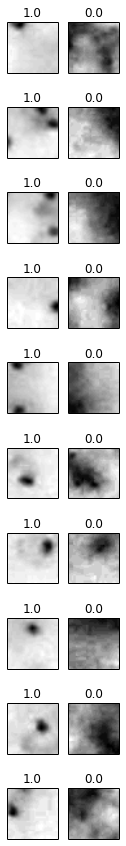

In [57]:
mistakes = np.where(np.logical_xor(y_pred>.5,y_test))[0]

nn = neighbors.NearestNeighbors(n_neighbors=1)
nn.fit(X_train)

N_examples = 10
figsize(2,15)
for i in range(N_examples):
    subplot(N_examples,2,2*i+1)
    plt.imshow(np.reshape(X_test[mistakes[i],:],(40,40)), cmap=plt.cm.gray)
    plt.title(y_test[mistakes[i]])
    plt.xticks([])
    plt.yticks([])
    
    subplot(N_examples,2,2*i+2)
    neighbour_idx = int(nn.kneighbors(X_test[mistakes[i],:].reshape(1,-1))[1])
    plt.imshow(np.reshape(X_train[neighbour_idx,:],(40,40)), cmap=plt.cm.gray)
    plt.title(y_train[neighbour_idx])
    plt.xticks([])
    plt.yticks([])

### Show Receiver Operating Characteristics curve

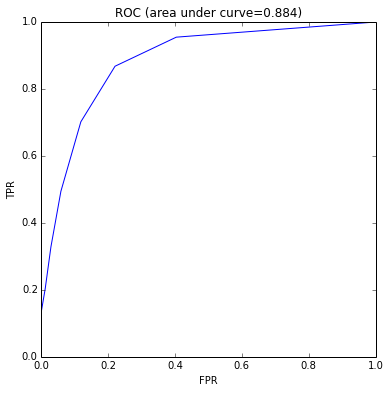

In [65]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

figsize(6,6)
plot(fpr, tpr)
title('ROC (area under curve=%.3f)' % (metrics.roc_auc_score(y_test, y_pred)))
plt.xlabel('FPR')
plt.ylabel('TPR')

### Show classifier probabilities on test images

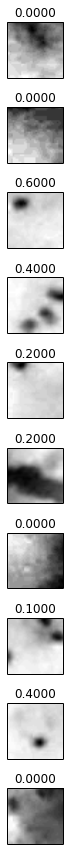

In [66]:
figsize(1,15)
N_examples = 10
for i in range(N_examples):
    subplot(N_examples,1,i)
    plt.imshow(np.resize(X_test[i,:],(40,40)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title('%.4f' % y_pred[i])

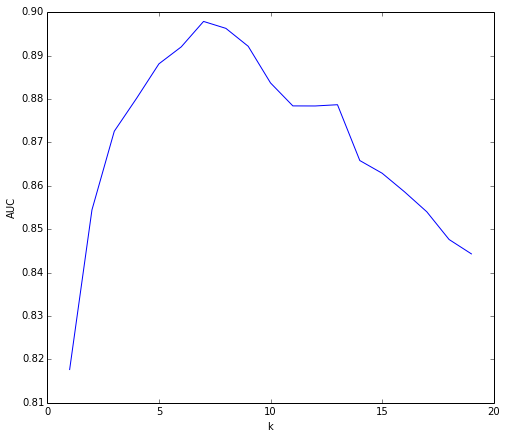

In [17]:
score = []
max_k = 20
figsize(8,7)
for k in range(1,max_k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    score.append(metrics.roc_auc_score(y_test,y_pred))
    
plot(range(1,max_k),score)
plt.xlabel('k')
plt.ylabel('AUC')